# M5 Versuch: Oberflächenspannung
Dieses Jyputer Notebook beinhaltet eine Datenanalyse zur Oberflächenspannung. Die verwendete Methode nennt sich Bügelmethode. Die Ergebnisse lassen sich als untere Schranke für die Oberflächenspannung von Wasser (bei $ 20^{°} $C) interpretieren.  
  
Der Code wurde von mir selbst geschrieben. An Stellen, die nicht von mir stammen, habe ich dies erwähnt.

# Importe

In [1]:
# Eigene Importe
import numpy as np
import matplotlib.pyplot as plt
# from uncertainties import ufloat, unumpy as unp


import pandas as pd
from scipy.optimize import curve_fit
import statsmodels.api as sm
import scipy as sp

# Importe für den Code meines Kommilitonen
import scipy.stats as stats
# from numpy import linalg as la
# from scipy.stats import chi2

# aus matplotlib Dokumentation entnommen
plt.style.use('classic')
plt.rc('text',usetex=True) 
#plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen

In [4]:
from Praktikumsfunktionen.py import lin_reg

ModuleNotFoundError: No module named 'Praktikumsfunktionen'

# Daten laden

In [2]:
# masse ohne und mit Fehler
m_R=1.288/1000                      # in kg
m_R_err=ufloat(m_R,3e-3/1000)

# draht länge
l=50.5/1000                         # in meter
l_err=ufloat(50.5,0.5)/1000

print(l_err)
print(m_R_err)

0.0505+/-0.0005
0.0012880+/-0.0000030


In [3]:
A1=pd.read_csv('A1.txt','\t',index_col='a_i')
A1

,hin,zurück
a_i,,
a0,7.58,8.28
a1,9.04,9.22
a2,10.75,10.21
a3,11.74,11.21
a4,12.41,12.41
a5,13.40,13.37
a6,14.29,14.40
a7,15.20,15.13
a8,16.34,16.48


In [4]:
hin=A1['hin'].values/1000           # meter
zurück=A1['zurück'].values/1000
print(zurück)

[0.00828 0.00922 0.01021 0.01121 0.01241 0.01337 0.0144  0.01513 0.01648
     nan]


In [5]:
A2_T1=pd.read_csv('A2_T1.txt','\t',index_col='Index')
A2_T1

,M1,M2
Index,,
a0,7.25,12.80
a1,7.02,13.05
a2,7.28,12.50
a3,7.04,12.37
a4,7.04,11.99
a5,7.22,11.39


In [6]:
M1=A2_T1['M1'].values/1000      # meter
M2=A2_T1['M2'].values/1000

In [7]:
# Unsicherheit von M1, M2, hin und zurück
u_hin=0.13/1000*np.ones(len(hin))
u_zurück=0.13/1000*np.ones(len(zurück))
u_M=0.13/1000*np.ones(len(M1))

In [8]:
M1_err=unp.uarray(M1,u_M)
M2_err=unp.uarray(M2,u_M)

# Daten mit Unsicherheit

In [9]:
hin_err=unp.uarray(hin,u_hin)
zurück_err=unp.uarray(zurück,u_zurück)

M1_err=unp.uarray(M1,u_M)
M2_err=unp.uarray(M2,u_M)
print(M1_err)

[0.00725+/-0.00013000000000000002
 0.007019999999999999+/-0.00013000000000000002
 0.00728+/-0.00013000000000000002 0.00704+/-0.00013000000000000002
 0.00704+/-0.00013000000000000002 0.00722+/-0.00013000000000000002]


# Korrektur von a

$$ a_i' = a_i-a_0 $$

In [10]:
zurück1=zurück[1:len(zurück)-1]-zurück[0]
zurück_err1=zurück_err[1:len(zurück)-1]-zurück_err[0]
zurück1

array([0.00094, 0.00193, 0.00293, 0.00413, 0.00509, 0.00612, 0.00685,
       0.0082 ])

In [11]:
hin1=hin[1:]-hin[0]
hin_err1=hin_err[1:]-hin_err[0]
hin1

array([0.00146, 0.00317, 0.00416, 0.00483, 0.00582, 0.00671, 0.00762,
       0.00876, 0.00992])

# Schwerkraft
$$ F_i=i \cdot 0.1 \cdot m \cdot g $$

In [12]:
g=9.8130                           # m/s^2
g_err=ufloat(9.8130,0.0001)        # F4

F_hin=m_R*np.array([1,2,3,4,5,6,7,8,9])*0.1*g
F_hin_err=m_R_err*np.array([1,2,3,4,5,6,7,8,9])*0.1*g_err
print(F_hin)


F_zurück=m_R*np.array([1,2,3,4,5,6,7,8])*0.1*g
F_zurück_err=m_R_err*np.array([1,2,3,4,5,6,7,8])*0.1*g_err
print(F_zurück)

[0.00126391 0.00252783 0.00379174 0.00505566 0.00631957 0.00758349
 0.0088474  0.01011132 0.01137523]
[0.00126391 0.00252783 0.00379174 0.00505566 0.00631957 0.00758349
 0.0088474  0.01011132]


# Aufgabe 1: lineare Regression

In [13]:
def reg(x,a,b):
    f=a*x+b
    return f
print(g)


def f(x,a):
    k=x*a
    return k

9.813


## Fehler

In [14]:
# y Fehler
#print(hin_err1)
yerr_hin=18e-5*np.ones(9)

# x Fehler
#print(F_hin_err)
xerr=np.array([0.29,0.6,0.9,1.2,1.5,1.8,2.1,2.4,2.6])*1e-6

In [15]:
# y Fehler
print(zurück_err1)
yerr_zurück=18e-5*np.ones(8)

[0.0009400000000000016+/-0.00018384776310850236
 0.0019300000000000012+/-0.00018384776310850236
 0.002930000000000002+/-0.00018384776310850236
 0.004130000000000002+/-0.00018384776310850236
 0.005090000000000001+/-0.00018384776310850236
 0.0061200000000000004+/-0.00018384776310850236
 0.006850000000000002+/-0.00018384776310850236
 0.008200000000000002+/-0.00018384776310850236]


## Mit scipy

In [16]:
# mit scipy 
pop,cov=curve_fit(reg,F_hin,hin1,sigma=yerr_hin)#
a1,b1=pop
da1,db1=np.sqrt(np.diag(cov))
print(fr'a={ufloat(a1,da1)}')
print(fr'b={ufloat(b1,db1)}','\n\n')
print(hin1)
print(F_hin)

a=0.783+/-0.025
b=0.00088+/-0.00018 


[0.00146 0.00317 0.00416 0.00483 0.00582 0.00671 0.00762 0.00876 0.00992]
[0.00126391 0.00252783 0.00379174 0.00505566 0.00631957 0.00758349
 0.0088474  0.01011132 0.01137523]


In [17]:
pop,cov=curve_fit(f,F_hin,hin1,sigma=yerr_hin)#
a1_1=pop
da1_1=np.sqrt(np.diag(cov))
print(fr'a={ufloat(a1_1,da1_1)}')

a=0.893+/-0.023


In [18]:
pop,cov=curve_fit(f,F_hin[3:],hin1[3:],sigma=yerr_hin[3:])#
a1_1=pop
da1_1=np.sqrt(np.diag(cov))
print(fr'a={ufloat(a1_1,da1_1)}')

a=0.880+/-0.011


In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(F_hin,hin1)
R_sqrt=r_value**2
print(fr'$R^{2}$: {round(R_sqrt,3)}',' \n\n',f'p-Wert: {round(p_value,11)}')

$R^2$: 0.993  

 p-Wert: 9.28e-09


In [20]:
pop,cov=curve_fit(reg,F_zurück,zurück1,sigma=yerr_zurück)#
a2,b2=pop
da2,db2=np.sqrt(np.diag(cov))
print(fr'a={ufloat(a2,da2)}')
print(fr'b={ufloat(b2,db2)}','\n\n')
print(zurück1)
print(F_zurück)

a=0.810+/-0.015
b=(-8+/-9)e-05 


[0.00094 0.00193 0.00293 0.00413 0.00509 0.00612 0.00685 0.0082 ]
[0.00126391 0.00252783 0.00379174 0.00505566 0.00631957 0.00758349
 0.0088474  0.01011132]


In [21]:
pop,cov=curve_fit(f,F_zurück,zurück1,sigma=yerr_zurück)
a2_1=pop
da2_1=np.sqrt(np.diag(cov))
print(fr'a={ufloat(a2_1,da2_1)}')

a=0.798+/-0.007


In [22]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(F_zurück,zurück1)
R_sqrt2=r_value2**2
print(fr'$R^{2}$: {R_sqrt2}',' \n\n',f'p-Wert: {p_value2}')

$R^2$: 0.9979992738116954  

 p-Wert: 2.5046041769559793e-09


## mit Statsmodels

In [23]:
y=hin1
x_zunahme=sm.add_constant(F_hin)
results=sm.WLS(y,x_zunahme,sigma=yerr_hin).fit()#,sigma=yerr
print('''
Lineare Regression
''')
print(results.summary())


Lineare Regression

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            WLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     964.0
Date:                Fri, 13 Aug 2021   Prob (F-statistic):           9.28e-09
Time:                        20:14:19   Log-Likelihood:                 63.115
No. Observations:                   9   AIC:                            -122.2
Df Residuals:                       7   BIC:                            -121.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.00

C:\Users\Ben Fliegener\Miniconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [24]:
R_1=0.993

In [25]:
y=hin1[3:]
x_zunahme=sm.add_constant(F_hin[3:])
results=sm.WLS(y,x_zunahme,sigma=yerr_hin[3:]).fit()#,sigma=yerr
print('''
Lineare Regression
''')
print(results.summary())


Lineare Regression

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            WLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1308.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):           3.49e-06
Time:                        20:14:19   Log-Likelihood:                 47.061
No. Observations:                   6   AIC:                            -90.12
Df Residuals:                       4   BIC:                            -90.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.00

C:\Users\Ben Fliegener\Miniconda3\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [26]:
y=zurück1
x_zunahme=sm.add_constant(F_zurück)
results=sm.WLS(y,x_zunahme,sigma=yerr_zurück).fit()#,sigma=yerr
print('''
Lineare Regression
''')
print(results.summary())


Lineare Regression

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2993.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):           2.50e-09
Time:                        20:14:19   Log-Likelihood:                 61.943
No. Observations:                   8   AIC:                            -119.9
Df Residuals:                       6   BIC:                            -119.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.071e-05   9.44e-0

C:\Users\Ben Fliegener\Miniconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [27]:
R_2=0.998

# Plot

## chi Quadrat

In [28]:
# chi quadrat für hin
chi_hin=(hin1-reg(F_hin,a1,b1))**2/yerr_hin**2
chi_hin=chi_hin.sum()/(len(hin1)-2)
chi_hin

1.8833945718204976

In [29]:
hh=hin1[3:]
print(len(hh))
yy=f(F_hin,a1_1)[1:]
print(len(yy))
chi_hin1=(hin1-f(F_hin,a1_1))**2/yerr_hin**2
chi_hin1=chi_hin1.sum()/(len(hin1)-2)
chi_hin1

6
8


8.651338459521348

In [30]:
hh=hin1[3:]
print(len(hh))
yy=f(F_hin,a1_1)[1:]
print(len(yy))
chi_hin2=(hin1[3:]-f(F_hin,a1_1)[3:])**2/yerr_hin[3:]**2
chi_hin2=chi_hin2.sum()/(len(hin1)-2)
chi_hin2

6
8


1.1821036464332921

In [31]:
chi_zurück=(zurück1-reg(F_zurück,a2,b2))**2/yerr_zurück**2
chi_zurück=chi_zurück.sum()/(len(zurück1)-2)
chi_zurück

0.4534648736037618

In [32]:
chi_zurück1=(zurück1-f(F_zurück,a2_1))**2/yerr_zurück**2
chi_zurück1=chi_zurück1.sum()/(len(zurück1)-2)
chi_zurück1

0.5086616436698087

In [33]:
hin1

array([0.00146, 0.00317, 0.00416, 0.00483, 0.00582, 0.00671, 0.00762,
       0.00876, 0.00992])

## Plots
Der Kasten um die Grafik mit den Achsenabschnitten wurde mithilfe der Dokumentation von matplotlib porgrammiert. Den Code für die zweiteilige Legende habe ich aus dem Internet bezogen. Jedoch habe ich es vergessen, mir die Quelle aufzuschreiben. Deshalb kann ich die Quelle nicht angeben.

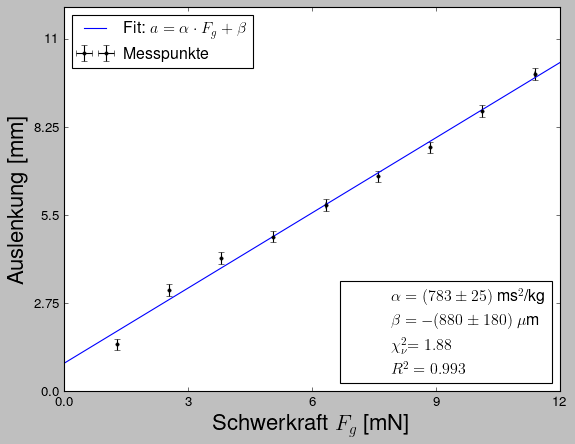

In [34]:
ff=np.linspace(0,0.012,500)
x_a1=[r'a_1',r'a_2',r'a_3',r'a_4',r'a_5',r'a_6',r'a_7',r'a_8',r'a_9']

fig=plt.figure()
ax=fig.add_subplot(111)
ax.errorbar(F_hin,hin1,xerr=xerr,yerr=yerr_hin,fmt='k.',label='Messpunkte')
ax.plot(ff,reg(ff,a1,b1),label=r'Fit: $a=\alpha \cdot F_g+\beta$')
#ax.plot(ff,f(ff,a1_1),label=r'Fit 1: $a=\alpha \cdot F_g+\beta$')

par1, = ax.plot([],[],' ')
par2, = ax.plot([],[],' ' )
par3, = ax.plot([],[],' ')
par4, = ax.plot([],[],' ' )

#locs, labels = ax.set_xticks()  

ax.set_xlabel(r'Schwerkraft $F_g$ [mN]')
ax.set_ylabel(r'Auslenkung [mm]')

plt.xticks(np.array([0.000,0.003,0.006,0.009,0.012]),['0.0','3','6','9','12'])
plt.yticks(np.arange(0,0.0111,step=0.00275),[0.0,2.75,5.5,8.25,11])
leg1= ax.legend(loc=2)

chi1=r'$\chi_{\nu}^{2}$'+f'$={round(chi_hin,2)}$'

leg2=ax.legend([par1,par2,par3,par4],
               [r'$\alpha=(783\pm 25)$ ms$^2$/kg',
                r'$\beta = -(880\pm 180)$ $\mu$m',
               chi1,
               r'$R^{2}=0.993$'],
              loc=4)
ax.add_artist(leg1)


#fig.savefig('M5_Hinweg.pdf',dpi=600)

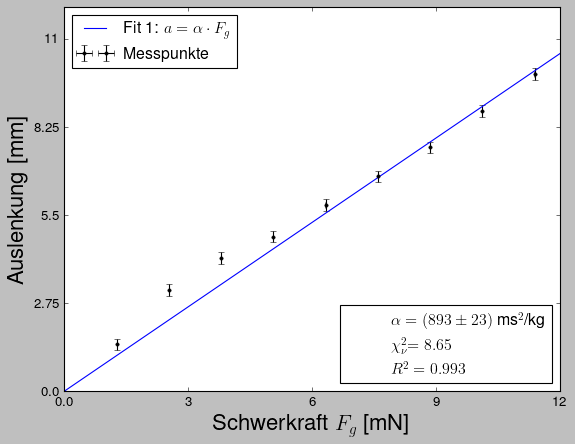

In [35]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.errorbar(F_hin,hin1,xerr=xerr,yerr=yerr_hin,fmt='k.',label='Messpunkte')
#ax.plot(ff,reg(ff,a1,b1),label=r'Fit: $a=\alpha \cdot F_g+\beta$')
ax.plot(ff,f(ff,a1_1),label=r'Fit 1: $a=\alpha \cdot F_g$')

par1, = ax.plot([],[],' ')
par2, = ax.plot([],[],' ' )
par3, = ax.plot([],[],' ')
par4, = ax.plot([],[],' ' )

#locs, labels = ax.set_xticks()  

ax.set_xlabel(r'Schwerkraft $F_g$ [mN]')
ax.set_ylabel(r'Auslenkung [mm]')

plt.xticks(np.array([0.000,0.003,0.006,0.009,0.012]),['0.0','3','6','9','12'])
plt.yticks(np.arange(0,0.0111,step=0.00275),[0.0,2.75,5.5,8.25,11])
leg1= ax.legend(loc=2)

chi2=r'$\chi_{\nu}^{2}$'+f'$={round(chi_hin1,2)}$'

leg2=ax.legend([par1,par2,par3,par4],
               [r'$\alpha=(893\pm 23)$ ms$^2$/kg',
               chi2,
               r'$R^{2}=0.993$'],
              loc=4)
ax.add_artist(leg1)


#fig.savefig('M5_Hinweg_1.pdf',dpi=600)

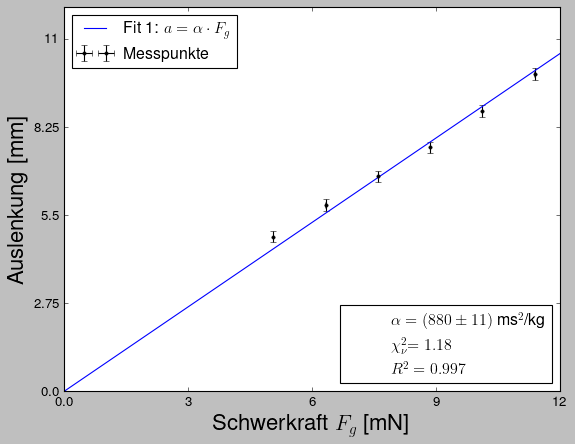

In [36]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.errorbar(F_hin[3:],hin1[3:],xerr=xerr[3:],yerr=yerr_hin[3:],fmt='k.',label='Messpunkte')
#ax.plot(ff,reg(ff,a1,b1),label=r'Fit: $a=\alpha \cdot F_g+\beta$')
ax.plot(ff,f(ff,a1_1),label=r'Fit 1: $a=\alpha \cdot F_g$')

par1, = ax.plot([],[],' ')
par2, = ax.plot([],[],' ' )
par3, = ax.plot([],[],' ')
par4, = ax.plot([],[],' ' )

#locs, labels = ax.set_xticks()  

ax.set_xlabel(r'Schwerkraft $F_g$ [mN]')
ax.set_ylabel(r'Auslenkung [mm]')

plt.xticks(np.array([0.000,0.003,0.006,0.009,0.012]),['0.0','3','6','9','12'])
plt.yticks(np.arange(0,0.0111,step=0.00275),[0.0,2.75,5.5,8.25,11])
leg1= ax.legend(loc=2)

chi3=r'$\chi_{\nu}^{2}$'+f'$={round(chi_hin2,2)}$'


leg2=ax.legend([par1,par2,par3,par4],
               [r'$\alpha=(880\pm 11)$ ms$^2$/kg',
               chi3,
               r'$R^{2}=0.997$'],
              loc=4)
ax.add_artist(leg1)


#fig.savefig('M5_Hinweg_2.pdf',dpi=600)

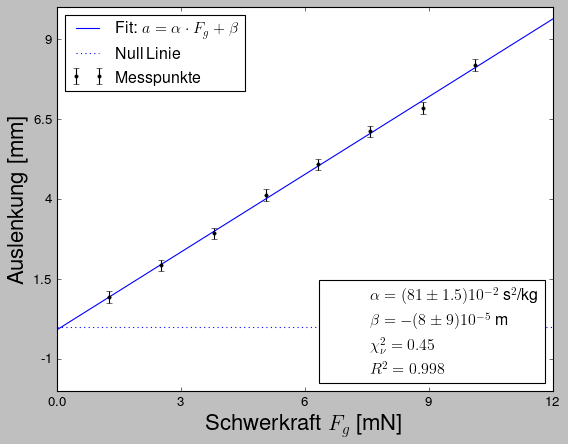

In [37]:
## 0 Linie
y=np.zeros(100)
#print(y)
x=np.linspace(0.0,0.012,100)
#print(x)
# Plot
fig= plt.figure()
ax=fig.add_subplot(111)

ax.errorbar(F_zurück,zurück1,yerr=yerr_zurück,fmt='k.',label='Messpunkte')
ax.plot(ff,reg(ff,a2,b2),label=r'Fit: $a=\alpha \cdot F_g+\beta$')

ax.plot(x,y,'b:',label='Null Linie')

par1, = plt.plot([],[],' ')
par2, = plt.plot([],[],' ')
par3, = plt.plot([],[],' ')
par4, = plt.plot([],[],' ')

ax.set_xlabel(r'Schwerkraft $F_g$ [mN]')
ax.set_ylabel(r'Auslenkung [mm]')

plt.xticks(np.array([0.000,0.003,0.006,0.009,0.012]),['0.0','3','6','9','12'])
plt.yticks(np.arange(-0.001,0.0092,step=0.0025),[-1,1.5,4,6.5,9])
leg1=ax.legend(loc=2)

leg2=ax.legend([par1,par2,par3,par4],
               [r'$\alpha=(81\pm 1.5)10^{-2}$ s$^2$/kg',
                r'$\beta = -(8\pm 9)10^{-5}$ m',
               r'$\chi_{\nu}^{2}=0.45$',
               r'$R^{2}=0.998$'],
              loc=4)
ax.add_artist(leg1)

#plt.legend(loc=4)
#fig.savefig('M5_Rückweg.pdf',dpi=600)

# Berechnung der Federkonstante
$$ a= \frac{1}{k}\\k= \frac{1}{a}$$

In [38]:
k_1_err=1/ufloat(a1,da1)
print(k_1_err)
print(ufloat(a1,da1))

1.28+/-0.04
0.783+/-0.025


In [39]:
u_k1=np.sqrt(da1**2/a1**4)
u_k1

0.0411119978038755

In [40]:
k_2_err=1/ufloat(a2,da2)
print(k_2_err)
print(ufloat(a2,da2))

1.235+/-0.023
0.810+/-0.015


In [41]:
u_k2=np.sqrt(da2**2/a2**4)
u_k2

0.022578977571094012

In [42]:
k_mean_err=np.array([k_1_err,k_2_err])
u_k=np.sqrt(0.04**2+0.023**2)
print(u_k)
print(k_mean_err.mean())
k_err=ufloat(1.26,0.05)
print(k_err)

0.046141087980237305
1.256+/-0.023
1.26+/-0.05


## Korrektur

In [43]:
k_1_hin=1.120
u_1_hin=0.028
k_2_hin=1.136
u_2_hin=0.011

# Aufgabe 2


In [44]:
delta_M=M2-M1
del_M_err=M2_err-M1_err
print(delta_M)
print(del_M_err)

[0.00555 0.00603 0.00522 0.00533 0.00495 0.00417]
[0.00555+/-0.00018384776310850236
 0.0060300000000000015+/-0.00018384776310850236
 0.005220000000000001+/-0.00018384776310850236
 0.005329999999999999+/-0.00018384776310850236
 0.00495+/-0.00018384776310850236
 0.004170000000000001+/-0.00018384776310850236]


$$\sigma= \frac{F}{2l}\\ = \frac{x k}{2 l}$$

In [45]:
def sigma(x,k,l):
    s=x*k/(2*l)
    s_m=s.mean()
    return s_m

In [46]:
#print(del_M_err)
k=1.26
print(k_err)
print(l_err)

1.26+/-0.05
0.0505+/-0.0005


In [47]:
u_x=0.13/1000
u_k=0.05
u_l=0.5/1000

dM=delta_M.mean()
u_sig=np.sqrt((k/(2*l))**2*u_x**2+u_k**2*dM**2/(4*l**2)+k**2*dM**2/(4*l**4)*u_l**2)
u_sig/1e-3

3.113213001623746

In [48]:
sig=sigma(del_M_err,k_err,l_err)    # kg/s^2
print(sig/1e-3)

65.0+/-2.8


## Korrektur

In [49]:
k=1.28
u_k=0.04
sig=sigma(delta_M,k,l).mean()
print(sig/1e-3)
u_sig=np.sqrt((k/(2*l))**2*u_x**2+u_k**2*dM**2/(4*l**2)+k**2*dM**2/(4*l**4)*u_l**2)
u_sig/1e-3

66.00660066006601


2.719595069900761

In [50]:
sig_1=sigma(delta_M,k_1_hin,l).mean()
print(sig_1/1e-3)
u_sig=np.sqrt((k_1_hin/(2*l))**2*u_x**2+u_1_hin**2*dM**2/(4*l**2)+k_1_hin**2*dM**2/(4*l**4)*u_l**2)
u_sig/1e-3

57.755775577557756


2.1189611015206262

In [51]:
sig_2=sigma(delta_M,k_2_hin,l).mean()
print(sig_2/1e-3)
u_sig=np.sqrt((k_2_hin/(2*l))**2*u_x**2+u_2_hin**2*dM**2/(4*l**2)+k_2_hin**2*dM**2/(4*l**4)*u_l**2)
u_sig/1e-3

58.580858085808565


1.6721665605220764

# Einschätzung: $ \chi^2_{\nu}$

Der folgende Code wurde von einem Kommilitonen von mir geschrieben.

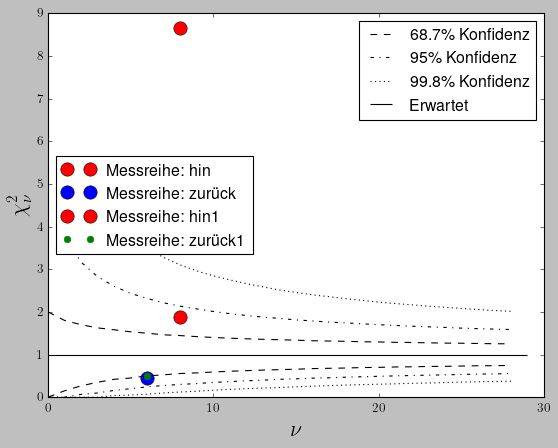

In [52]:
def Konfidenzintervall(Bereich,nü,Untergrenze,Obergrenze):
    oben=[]
    unten=[]
    T=np.arange(0.0, Bereich, 0.1)
    for n in range (1,nü):
        lol=[]
        ja=[]
        for x in T:
            chi=sp.stats.chi2.cdf(x, n)
          #  print(n,x,chi)
            if chi<Untergrenze:
                lol.clear()
                lol.append(x/n)
            if chi>Obergrenze:
                ja.append(x/n)
#                print(x,n,ja,lol)

                break
 #       print(x,n,ja,lol)
        oben.append(ja[0])
        unten.append(lol[0])
    return oben, unten


oberst=Konfidenzintervall(50,30,0.166,0.833)[0]
unterst=Konfidenzintervall(50,30,0.166,0.833)[1]

oberst2=Konfidenzintervall(50,30,0.026,0.976)[0]
unterst2=Konfidenzintervall(50,30,0.026,0.976)[1]

oberst3=Konfidenzintervall(80,30,0.001,0.999)[0]
unterst3=Konfidenzintervall(80,30,0.001,0.999)[1]

x=[0,1,2,3,4,5,6,7,8,9]
for t in range(10,29):
    x.append(t)
oberst2_re=[]
for t in range(1,len(oberst3)):
    k=oberst2[t]
    oberst2_re.append(k)
    
x_ra=[]
for t in range(1,len(x)):
    x_ra.append(t)

x_re=[]
for t in range(4,len(x)):
    x_re.append(t)
oberst3_re=[]
for t in range(4,len(oberst3)):
    k=oberst3[t]
    oberst3_re.append(k)

    
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(x,oberst,'k--',label=r"68.7\% Konfidenz")
ax.plot(x,unterst,'k--')
ax.plot(x_ra,oberst2_re,'k-.',label=r"95\% Konfidenz")
ax.plot(x,unterst2,'k-.')
ax.plot(x_re,oberst3_re,'k:',label=r"99.8\% Konfidenz")
ax.plot(x,unterst3,'k:')


# chi^2
chi_hin, = ax.plot([len(hin)-2],[chi_hin],'ro', markersize=12)   #hier immer den reduz. chi quadrat und nü angeben
chi_zur, = ax.plot([len(zurück1)-2],[chi_zurück],'bo', 
             markersize=12,zorder=1)   #hier immer den reduz. chi quadrat und nü angeben
chi_hin1, = ax.plot(len(hin)-2,(chi_hin1),'ro', markersize=12)   #hier immer den reduz. chi quadrat und nü angeben
chi_zur1, = ax.plot(len(zurück1)-2,(chi_zurück1),'g.', 
             markersize=12,zorder=2)
ax.hlines(1, 0, len(x), colors='black', linestyles='solid', label='Erwartet')

#pyplot.plot(9,(19/9),color='lime', marker='o', linestyle='dashed',linewidth=2, markersize=12)   #hier immer den reduz. chi quadrat und nü angeben
ax.set_ylabel(r" $\chi^{2}_{\nu}$")
ax.set_xlabel(r" $\nu$")
ax.set_xticks(np.arange(0,30.1,step=10))
ax.set_yticks(np.arange(0,9.1,step=1.0))
#plt.title("Konfidenzintervall vs Freiheitsgrade im reduzierten Chi Quadrat")
leg1=ax.legend(loc=1)

leg2=ax.legend([chi_hin,chi_zur,chi_hin1,chi_zur1],
               ['Messreihe: hin','Messreihe: zurück','Messreihe: hin1','Messreihe: zurück1'],
              loc=6)
ax.add_artist(leg1)
plt.show()
#fig.savefig('M5_Chi_Quadrat.pdf',dpi=600)